In [2]:
from matplotlib.pyplot import imshow
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential


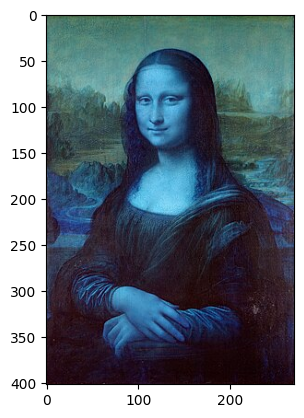

In [3]:
img1 = cv2.imread('/kaggle/input/monaalisa/ML.jpg')
plt.imshow(img1)
plt.show()

In [4]:
np.random.seed(42)
SIZE=256
img_data=[]
img1 = cv2.imread('/kaggle/input/monaalisa/ML.jpg',1)
img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.


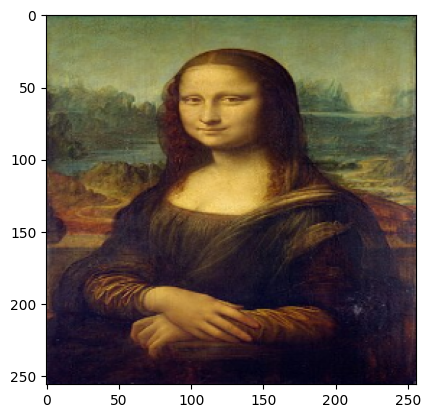

In [5]:
plt.imshow(img)
plt.show()

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 8)        0

Epoch 1/5000
1/1 [==============================] - 2s 2s/step - loss: 0.1114 - accuracy: 0.3595
Epoch 2/5000
1/1 [==============================] - 0s 199ms/step - loss: 0.1073 - accuracy: 0.4971
Epoch 3/5000
1/1 [==============================] - 0s 198ms/step - loss: 0.1014 - accuracy: 0.5111
Epoch 4/5000
1/1 [==============================] - 0s 193ms/step - loss: 0.0936 - accuracy: 0.5127
Epoch 5/5000
1/1 [==============================] - 0s 194ms/step - loss: 0.0840 - accuracy: 0.5134
Epoch 6/5000
1/1 [==============================] - 0s 190ms/step - loss: 0.0728 - accuracy: 0.5134
Epoch 7/5000
1/1 [==============================] - 0s 207ms/step - loss: 0.0611 - accuracy: 0.5134
Epoch 8/5000
1/1 [==============================] - 0s 183ms/step - loss: 0.0521 - accuracy: 0.5134
Epoch 9/5000
1/1 [==============================] - 0s 172ms/step - loss: 0.0522 - accuracy: 0.5134
Epoch 10/5000
1/1 [==============================] - 0s 182ms/step - loss: 0.0597 - accuracy: 0.5134
Ep

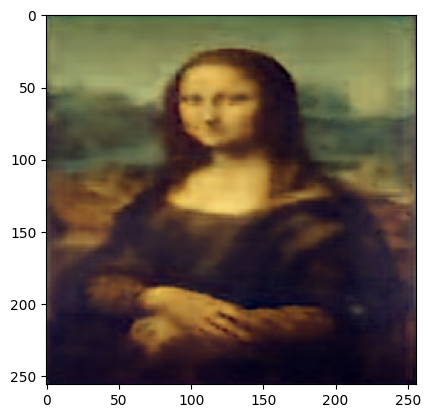

In [7]:
model.fit(img_array, img_array,
        epochs=5000,
        shuffle=True)

print("Neural network output")
pred = model.predict(img_array)

imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")